# Exploratory Data Analysis - Car Data
### Brandon Thomas & Richard Osborn - Spring 2022

### Exploring and Cleaning of Data

In [1]:
#importing normal packages used for exploratory data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm

In [2]:
#reading in data set and renaming data set to a different variable
car_data=pd.read_csv("imports-85.data.csv")

In [3]:
#sampling data to see variable and data types for analysis
car_data.sample(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
124,3,?,plymouth,gas,turbo,two,hatchback,rwd,front,95.9,...,156,spdi,3.59,3.86,7.0,145,5000,19,24,12764
193,0,?,volkswagen,gas,std,four,wagon,fwd,front,100.4,...,109,mpfi,3.19,3.4,9.0,88,5500,25,31,12290
135,2,104,saab,gas,std,four,sedan,fwd,front,99.1,...,121,mpfi,3.54,3.07,9.3,110,5250,21,28,15510
164,1,168,toyota,gas,std,two,hatchback,rwd,front,94.5,...,98,2bbl,3.19,3.03,9.0,70,4800,29,34,8238
112,0,161,peugot,diesel,turbo,four,sedan,rwd,front,107.9,...,152,idi,3.7,3.52,21.0,95,4150,28,33,16900


In [4]:
#getting statistical measures of continuous variables, realizing that all are not showing
car_data.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [5]:
#finding data types of each variable to be able to convert continuous object variables to form where statistical methods of analysis can be used
#like a float or int data type
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [11]:
#finding columns in dataset to easily pull out which are continuous and can be used in a correlation matrix
car_data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [13]:
#renaming columns for easier use to get rid of hyphens, pandas confuses them for the subtraction operator
car_data.columns = ['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
       'num_of_doors', 'body_style', 'drive_wheels', 'engine_location',
       'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price']

In [14]:
#making new variable that contains all continuous variables that will be used in correlation matrix
corr_columns = ['normalized_losses', 'aspiration',
       'wheel_base', 'length', 'width', 'height', 'curb_weight',
       'engine_size', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm','city_mpg',
       'highway_mpg','price']

In [15]:
#checking for missing values in data set denoted by '?'
car_data.isin(['?']).sum(axis=0)

symboling             0
normalized_losses    41
make                  0
fuel_type             0
aspiration            0
num_of_doors          2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_of_cylinders      0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

In [16]:
#making list of wanted values, in this case '?', 
values=['?']
car_data = car_data[car_data.normalized_losses.isin(values) == False]
car_data = car_data[car_data.num_of_doors.isin(values) == False]
car_data = car_data[car_data.bore.isin(values) == False]
car_data = car_data[car_data.stroke.isin(values) == False]
car_data = car_data[car_data.horsepower.isin(values) == False]
car_data = car_data[car_data.peak_rpm.isin(values) == False]
car_data = car_data[car_data.price.isin(values) == False]

In [17]:
#making sure there is no remaining missing data and removal process was succesful
car_data.isin(['?']).sum(axis=0)

symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_of_doors         0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [18]:
#converting object continuous variables to a more usable type for the purpose of the correlation matrix and further analysis
car_data = car_data.astype({"normalized_losses": float, 'bore': float, 'stroke': float, 'horsepower': float, 'peak_rpm': float, 'price': float})

In [19]:
#generating correlation matrix of newly converted continous variables that now shows all continuous variables 
car_data[corr_columns].corr()

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
normalized_losses,1.000000,-0.060086,0.035541,0.109726,-0.413702,0.125858,0.207820,-0.031558,0.063330,-0.127259,0.290511,0.237697,-0.235523,-0.188564,0.202761
wheel_base,-0.060086,1.000000,0.871534,0.814991,0.555767,0.810181,0.649206,0.578159,0.167449,0.291431,0.516948,-0.289234,-0.580657,-0.611750,0.734419
length,0.035541,0.871534,1.000000,0.838338,0.499251,0.871291,0.725953,0.646318,0.121073,0.184814,0.672063,-0.234074,-0.724544,-0.724599,0.760952
width,0.109726,0.814991,0.838338,1.000000,0.292706,0.870595,0.779253,0.572554,0.196619,0.258752,0.681872,-0.232216,-0.666684,-0.693339,0.843371
height,-0.413702,0.555767,0.499251,0.292706,1.000000,0.367052,0.111083,0.254836,-0.091313,0.233308,0.034317,-0.245864,-0.199737,-0.226136,0.244836
curb_weight,0.125858,0.810181,0.871291,0.870595,0.367052,1.000000,0.888626,0.645792,0.173844,0.224724,0.790095,-0.259988,-0.762155,-0.789338,0.893639
engine_size,0.207820,0.649206,0.725953,0.779253,0.111083,0.888626,1.000000,0.595737,0.299683,0.141097,0.812073,-0.284686,-0.699139,-0.714095,0.841496
bore,-0.031558,0.578159,0.646318,0.572554,0.254836,0.645792,0.595737,1.000000,-0.102581,0.015119,0.560239,-0.312269,-0.590440,-0.590850,0.533890
stroke,0.063330,0.167449,0.121073,0.196619,-0.091313,0.173844,0.299683,-0.102581,1.000000,0.243587,0.148804,-0.011312,-0.020055,-0.012934,0.160664
compression_ratio,-0.127259,0.291431,0.184814,0.258752,0.233308,0.224724,0.141097,0.015119,0.243587,1.000000,-0.162305,-0.416769,0.278332,0.221483,0.209361


<AxesSubplot:>

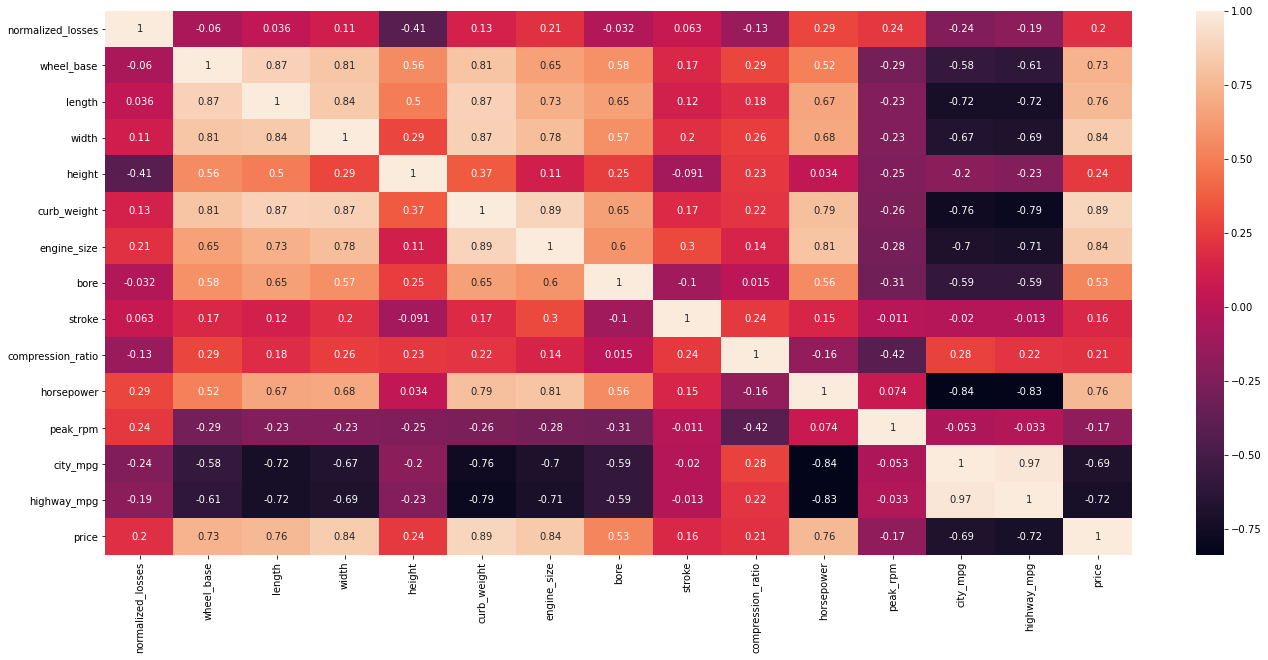

In [47]:
#making heatmap that corresponds to values generated in the correlation matrix
sns.heatmap(car_data[corr_columns].corr(),annot=True)

In [21]:
#getting the value counts of each car symboling rating
car_data.value_counts('symboling')

symboling
 0    48
 1    46
 2    29
-1    20
 3    13
-2     3
dtype: int64

In [22]:
#getting the value counts of each car make
car_data.value_counts('make')

make
toyota           31
nissan           18
honda            13
subaru           12
mazda            11
volvo            11
mitsubishi       10
dodge             8
volkswagen        8
peugot            7
plymouth          6
saab              6
mercedes-benz     5
bmw               4
audi              4
chevrolet         3
jaguar            1
porsche           1
dtype: int64

In [23]:
#getting the value counts of each fuel type
car_data.value_counts('fuel_type')

fuel_type
gas       144
diesel     15
dtype: int64

In [24]:
#getting the value counts of each aspiration type
car_data.value_counts('aspiration')

aspiration
std      132
turbo     27
dtype: int64

In [25]:
#getting the value counts of each type of number of doors
car_data.value_counts('num_of_doors')

num_of_doors
four    95
two     64
dtype: int64

In [26]:
#getting the value counts of each body style type
car_data.value_counts('body_style')

body_style
sedan          79
hatchback      56
wagon          17
hardtop         5
convertible     2
dtype: int64

In [27]:
#getting the value counts of each drive wheel type
car_data.value_counts('drive_wheels')

drive_wheels
fwd    105
rwd     46
4wd      8
dtype: int64

In [28]:
#getting the value counts of engline location types, in this data set there are no instances of rear engines
car_data.value_counts('engine_location')

engine_location
front    159
dtype: int64

In [29]:
#getting the value counts of engine type
car_data.value_counts('engine_type')

engine_type
ohc     123
ohcf     12
dohc      8
l         8
ohcv      8
dtype: int64

In [30]:
#getting the value counts of each cylinder number type
car_data.value_counts('num_of_cylinders')

num_of_cylinders
four     136
six       14
five       7
eight      1
three      1
dtype: int64

In [31]:
#getting the value counts of each fuel system type
car_data.value_counts('fuel_system')

fuel_system
mpfi    64
2bbl    63
idi     15
1bbl    11
spdi     5
mfi      1
dtype: int64

# Visualization - Graphs and Charts

<AxesSubplot:xlabel='price', ylabel='Count'>

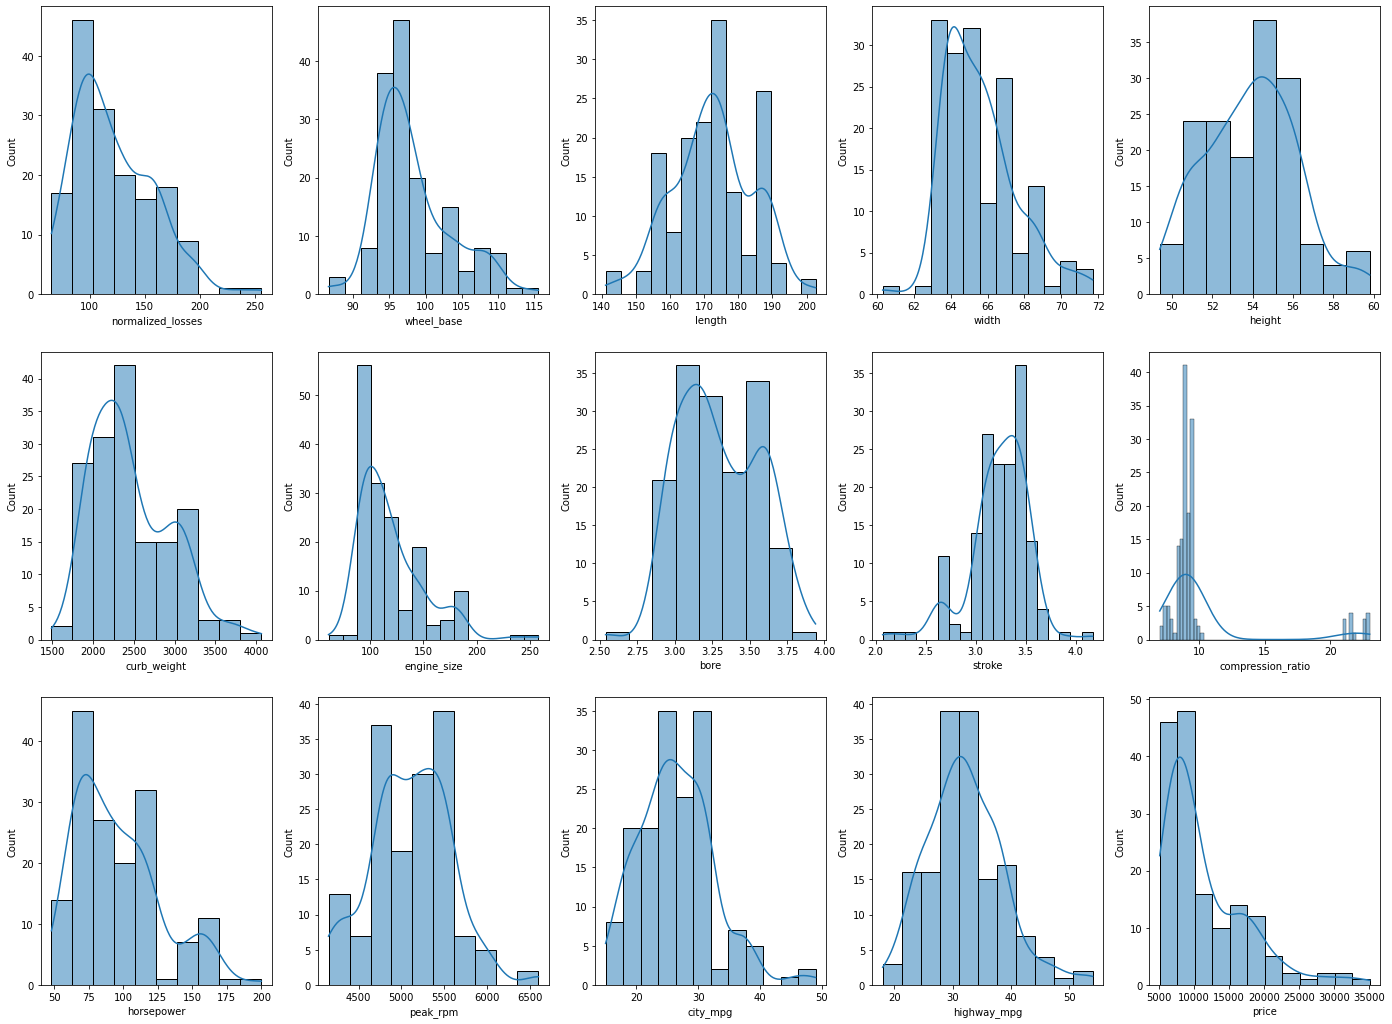

In [32]:
#figure with subplots of each continous variable, kernel density line is inscribed in each suplot
fig, axes = plt.subplots(3,5, figsize=(24,18))
sns.histplot(data=car_data, x="normalized_losses", kde=True, ax=axes[0,0])
sns.histplot(data=car_data, x="wheel_base", kde=True, ax=axes[0,1])
sns.histplot(data=car_data, x="length", kde=True, ax=axes[0,2])
sns.histplot(data=car_data, x="width", kde=True, ax=axes[0,3])
sns.histplot(data=car_data, x="height", kde=True, ax=axes[0,4])
sns.histplot(data=car_data, x="curb_weight", kde=True, ax=axes[1,0])
sns.histplot(data=car_data, x="engine_size", kde=True, ax=axes[1,1])
sns.histplot(data=car_data, x="bore", kde=True, ax=axes[1,2])
sns.histplot(data=car_data, x="stroke", kde=True, ax=axes[1,3])
sns.histplot(data=car_data, x="compression_ratio", kde=True, ax=axes[1,4])
sns.histplot(data=car_data, x="horsepower", kde=True, ax=axes[2,0])
sns.histplot(data=car_data, x="peak_rpm", kde=True, ax=axes[2,1])
sns.histplot(data=car_data, x="city_mpg", kde=True, ax=axes[2,2])
sns.histplot(data=car_data, x="highway_mpg", kde=True, ax=axes[2,3])
sns.histplot(data=car_data, x="price", kde=True, ax=axes[2,4])

Text(0.5, 0, 'Engine Type')

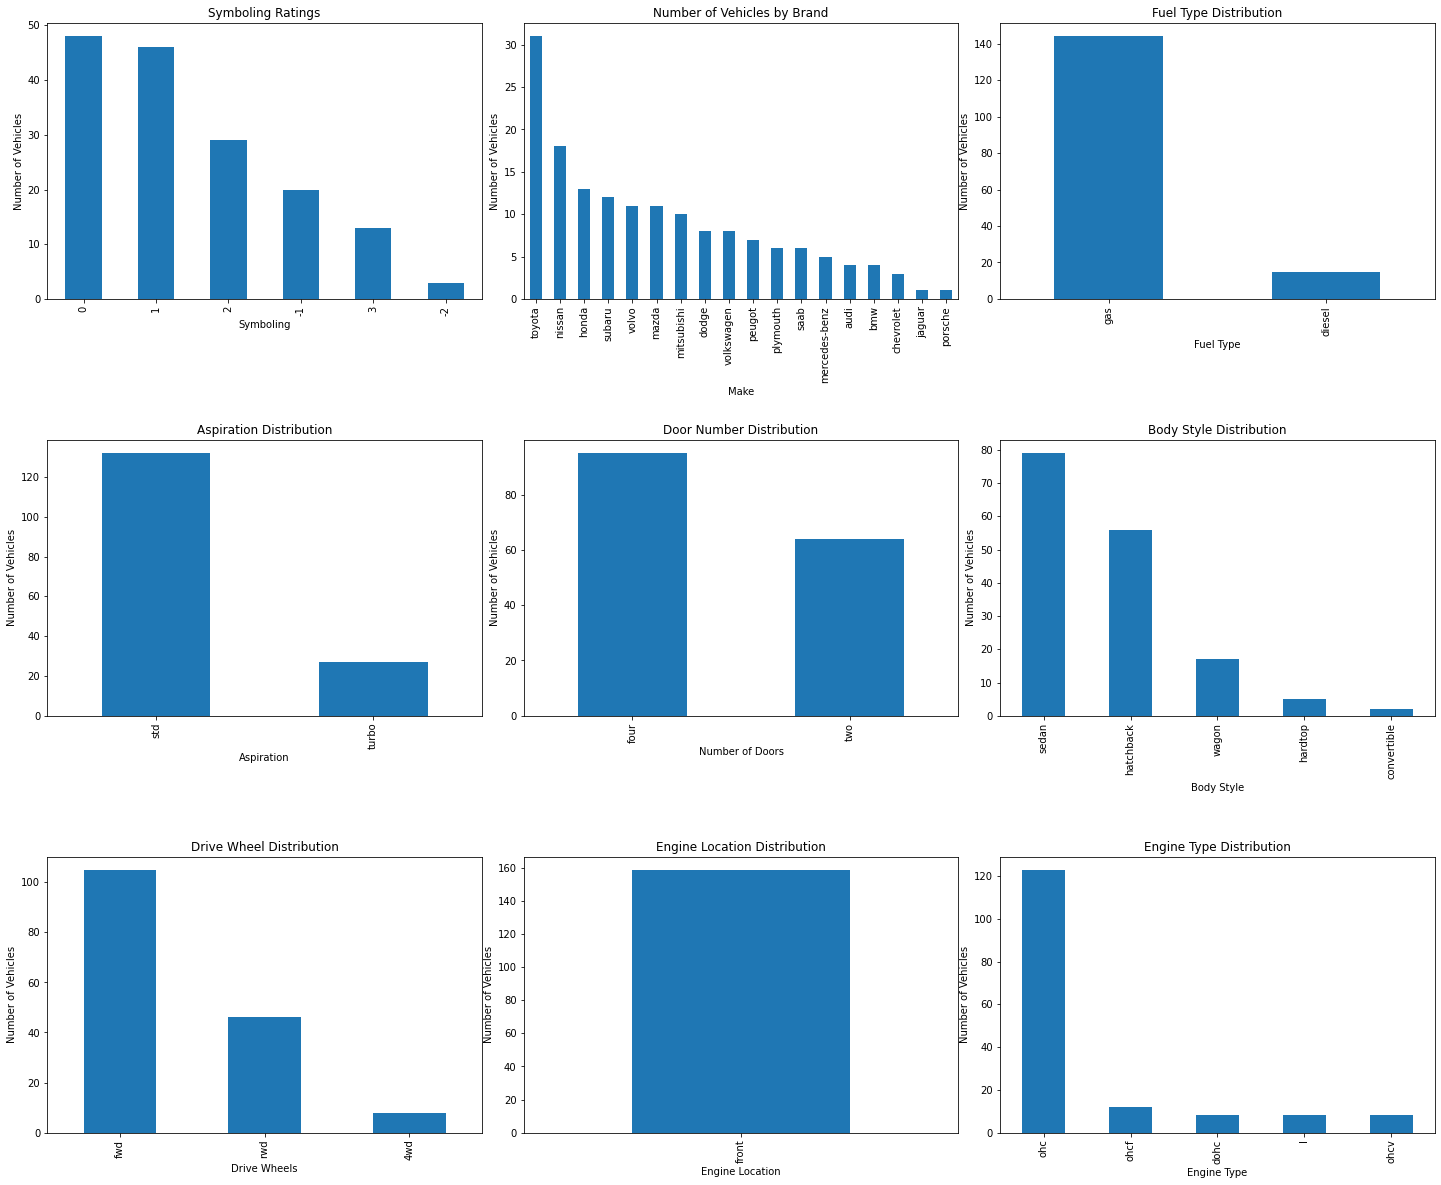

In [33]:
#first portion of figure that shows distribution of categorical variables, pandas only allows up to 9 subplots in one figure
fig, axes = plt.subplots(3,3, figsize=(20,16))
fig.tight_layout(h_pad=12)

plot1=plt.subplot(331)
plot1=car_data.symboling.value_counts().plot(kind='bar')
plt.title("Symboling Ratings")
plt.ylabel('Number of Vehicles')
plt.xlabel('Symboling')

plot2=plt.subplot(332)
plot2=car_data.make.value_counts().plot(kind='bar')
plt.title("Number of Vehicles by Brand")
plt.ylabel('Number of Vehicles')
plt.xlabel('Make')

plot3=plt.subplot(333)
plot3=car_data.fuel_type.value_counts().plot(kind='bar')
plt.title("Fuel Type Distribution")
plt.ylabel('Number of Vehicles')
plt.xlabel('Fuel Type')

plot4=plt.subplot(334)
plot4=car_data.aspiration.value_counts().plot(kind='bar')
plt.title("Aspiration Distribution")
plt.ylabel('Number of Vehicles')
plt.xlabel('Aspiration')

plot5=plt.subplot(335)
plot5=car_data.num_of_doors.value_counts().plot(kind='bar')
plt.title("Door Number Distribution")
plt.ylabel('Number of Vehicles')
plt.xlabel('Number of Doors')

plot6=plt.subplot(336)
plot6=car_data.body_style.value_counts().plot(kind='bar')
plt.title("Body Style Distribution")
plt.ylabel('Number of Vehicles')
plt.xlabel('Body Style')

plot7=plt.subplot(337)
plot7=car_data.drive_wheels.value_counts().plot(kind='bar')
plt.title("Drive Wheel Distribution")
plt.ylabel('Number of Vehicles')
plt.xlabel('Drive Wheels')

plot8=plt.subplot(338)
plot8=car_data.engine_location.value_counts().plot(kind='bar')
plt.title("Engine Location Distribution")
plt.ylabel('Number of Vehicles')
plt.xlabel('Engine Location')

plot9=plt.subplot(339)
plot9=car_data.engine_type.value_counts().plot(kind='bar')
plt.title("Engine Type Distribution")
plt.ylabel('Number of Vehicles')
plt.xlabel('Engine Type')

Text(0.5, 0, 'Fuel System')

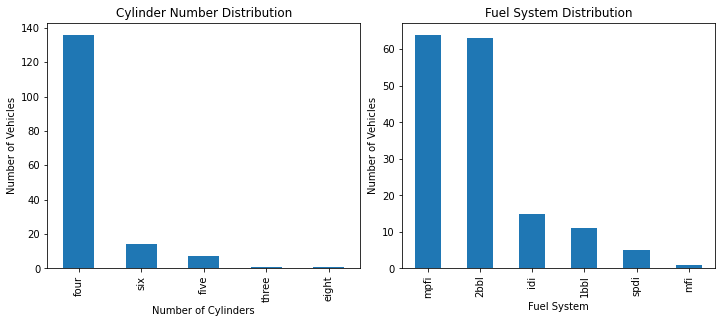

In [34]:
#second portion of figure that graphs distribution of remaining categorical variables
fig, axes = plt.subplots(1,2, figsize=(10,4))
fig.tight_layout(h_pad=12)

plot1=plt.subplot(121)
plot1=car_data.num_of_cylinders.value_counts().plot(kind='bar')
plt.title("Cylinder Number Distribution")
plt.ylabel('Number of Vehicles')
plt.xlabel('Number of Cylinders')

plot2=plt.subplot(122)
plot2=car_data.fuel_system.value_counts().plot(kind='bar')
plt.title("Fuel System Distribution")
plt.ylabel('Number of Vehicles')
plt.xlabel('Fuel System')

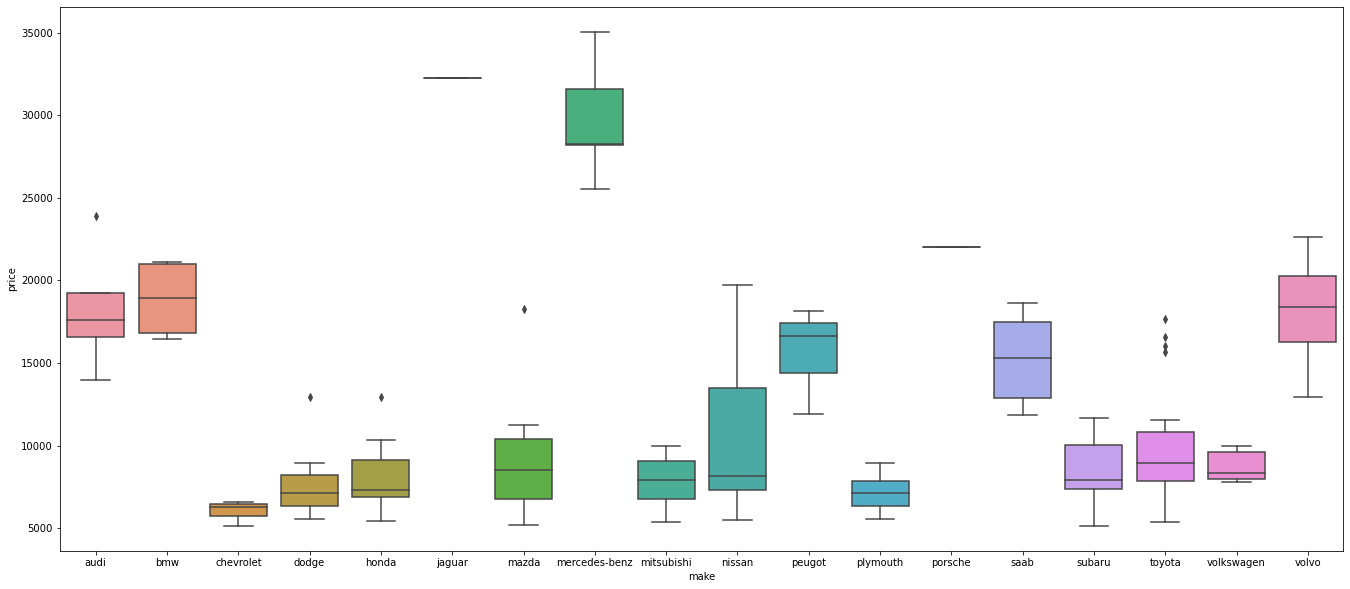

In [35]:
#boxplot of price vs make
plt.rcParams['figure.figsize']=(23,10)
ax = sns.boxplot(x="make", y="price", data=car_data)

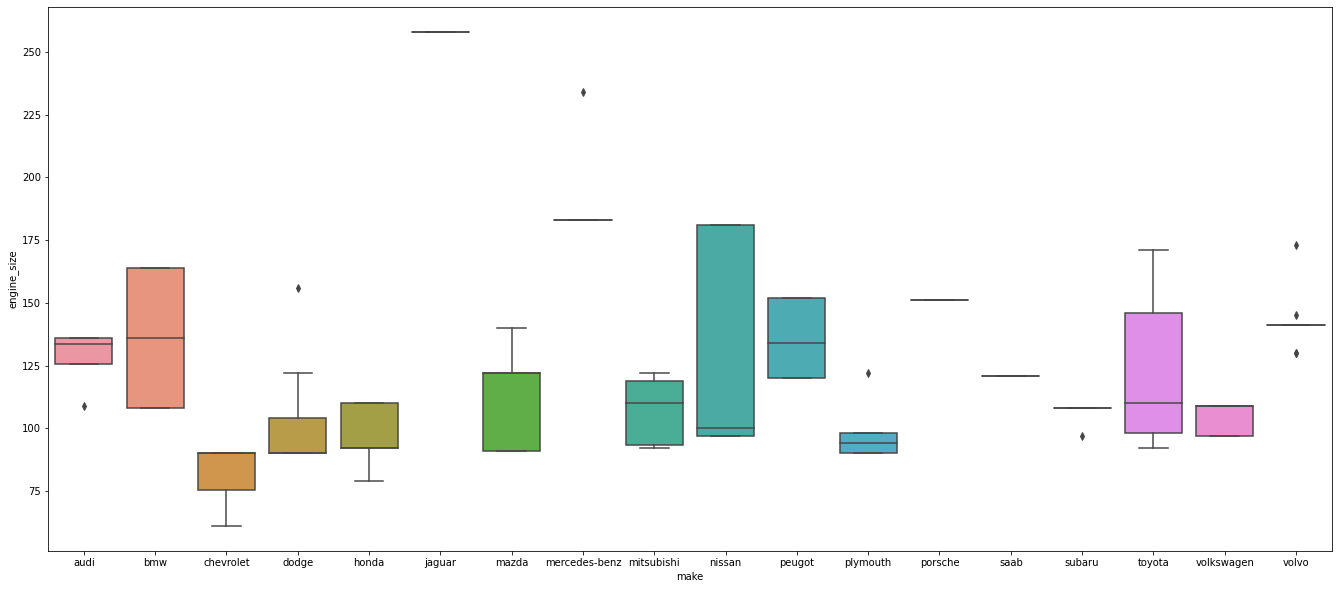

In [36]:
#boxplot of engine size vs make
plt.rcParams['figure.figsize']=(23,10)
ax = sns.boxplot(x="make", y="engine_size", data=car_data)

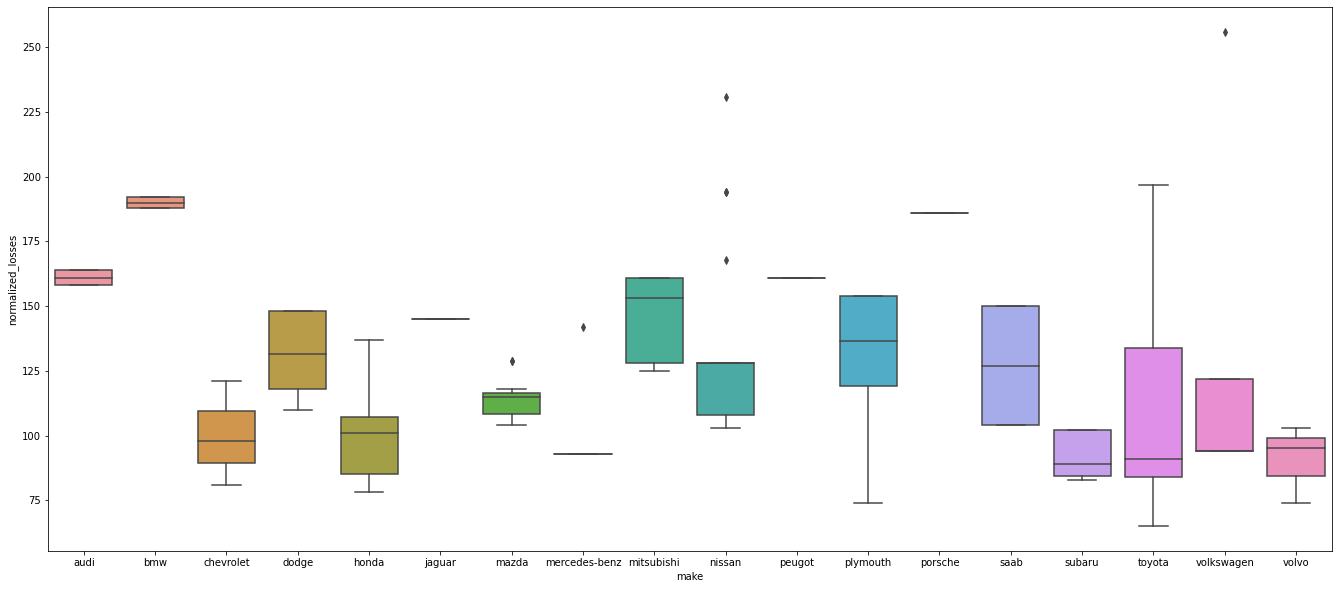

In [37]:
#boxplot of normalized losses vs make
plt.rcParams['figure.figsize']=(23,10)
ax = sns.boxplot(x="make", y="normalized_losses", data=car_data)

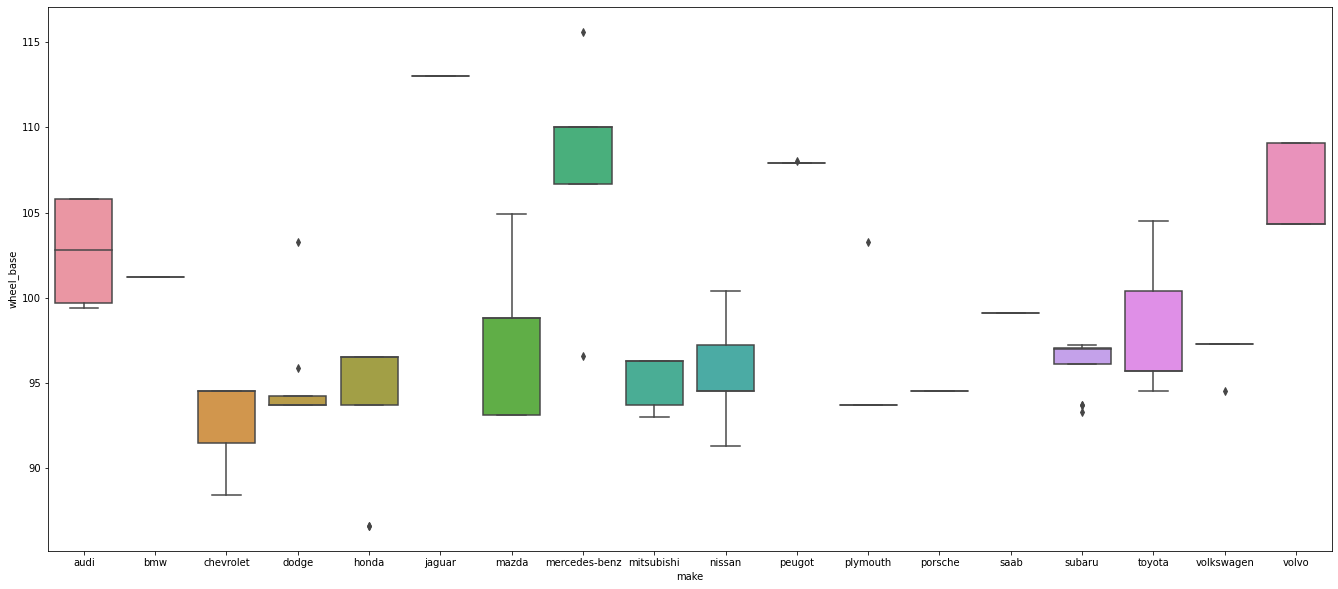

In [38]:
#boxplot of wheel base vs make
plt.rcParams['figure.figsize']=(23,10)
ax = sns.boxplot(x="make", y="wheel_base", data=car_data)

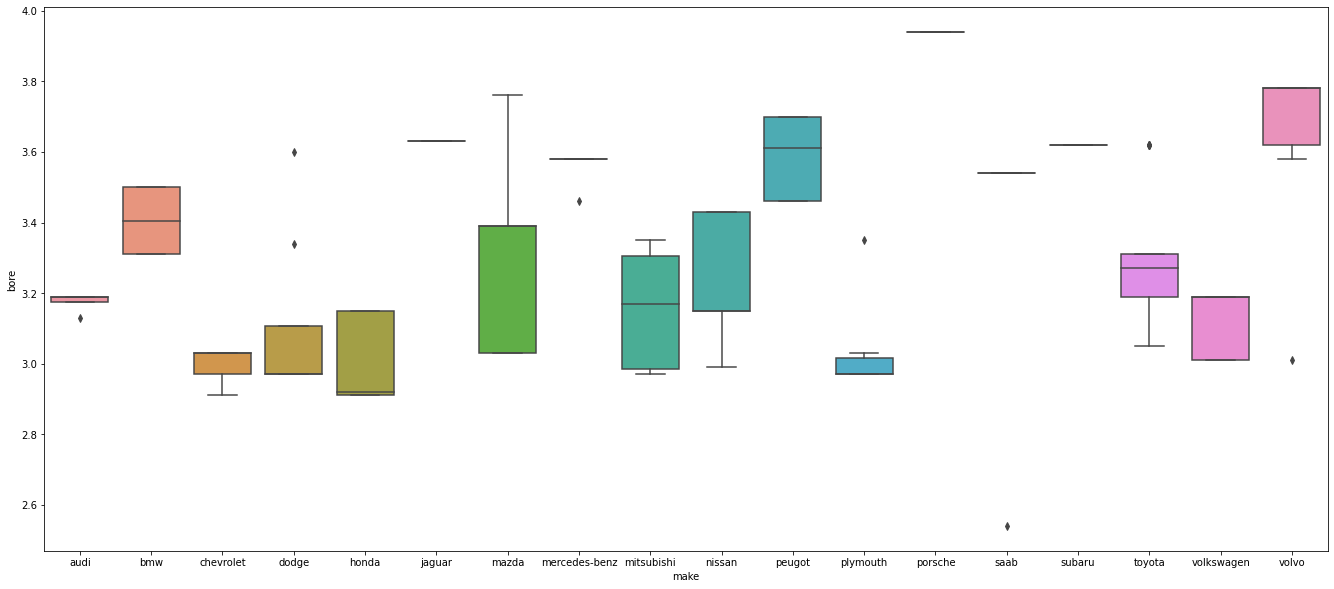

In [39]:
#boxplot of bore size vs make
plt.rcParams['figure.figsize']=(23,10)
ax = sns.boxplot(x="make", y="bore", data=car_data)

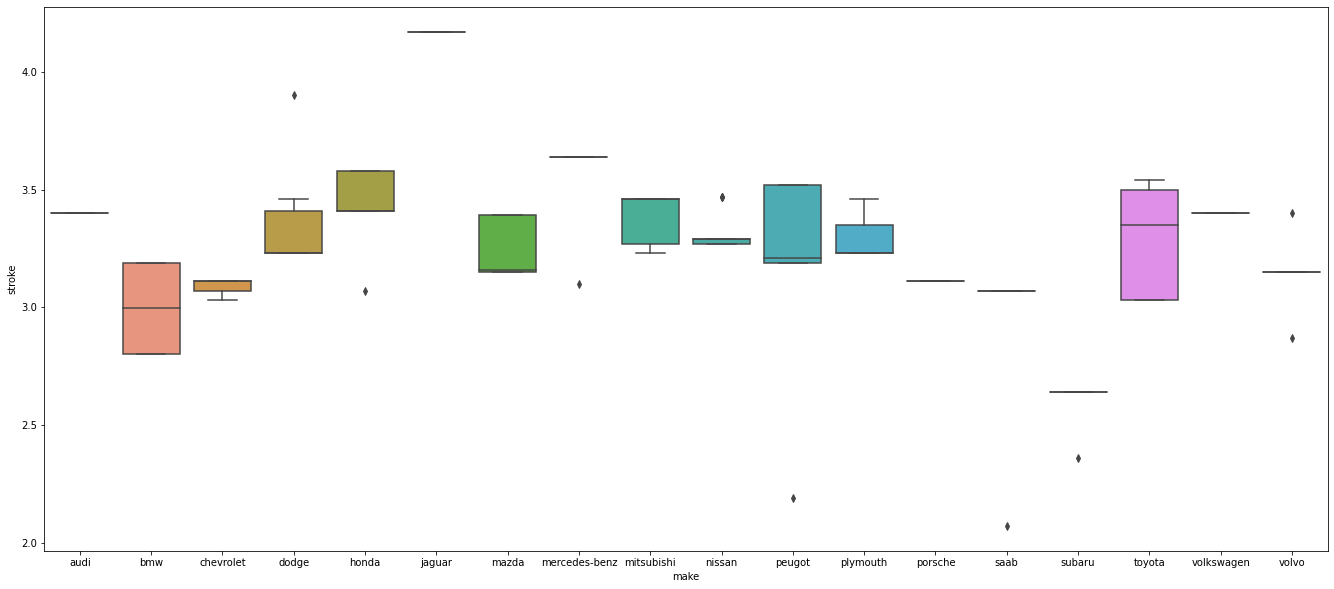

In [40]:
#boxplot of stroke vs make
plt.rcParams['figure.figsize']=(23,10)
ax = sns.boxplot(x="make", y="stroke", data=car_data)

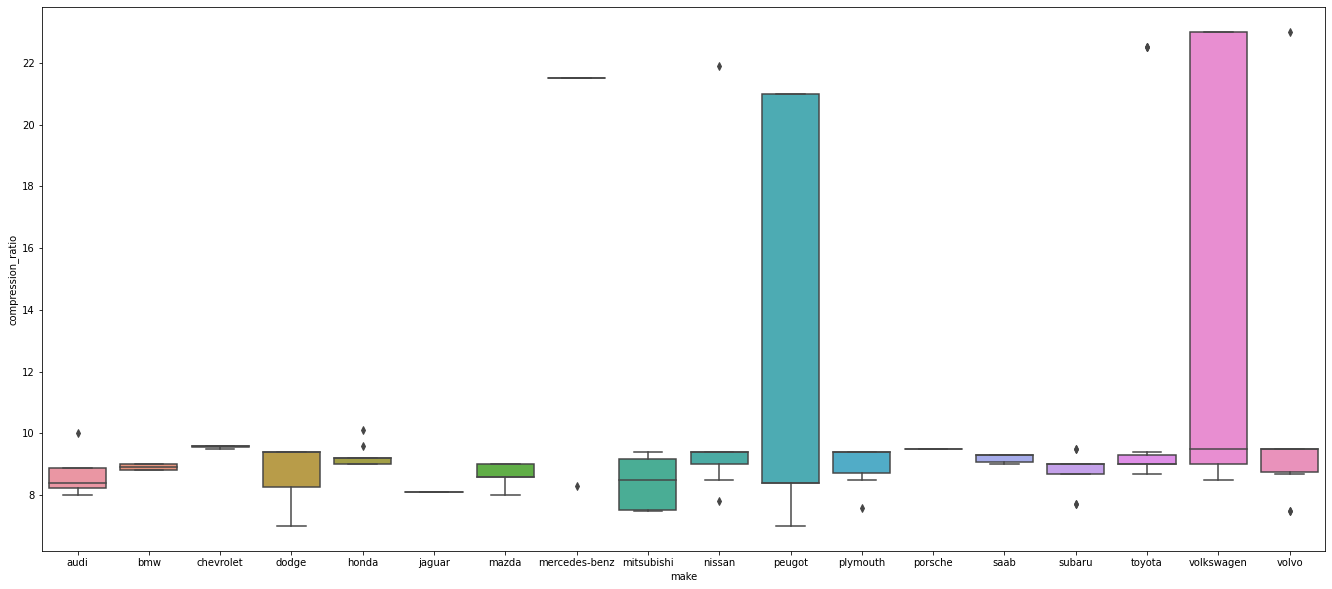

In [41]:
#boxplot of compression ratio vs make
plt.rcParams['figure.figsize']=(23,10)
ax = sns.boxplot(x="make", y="compression_ratio", data=car_data)

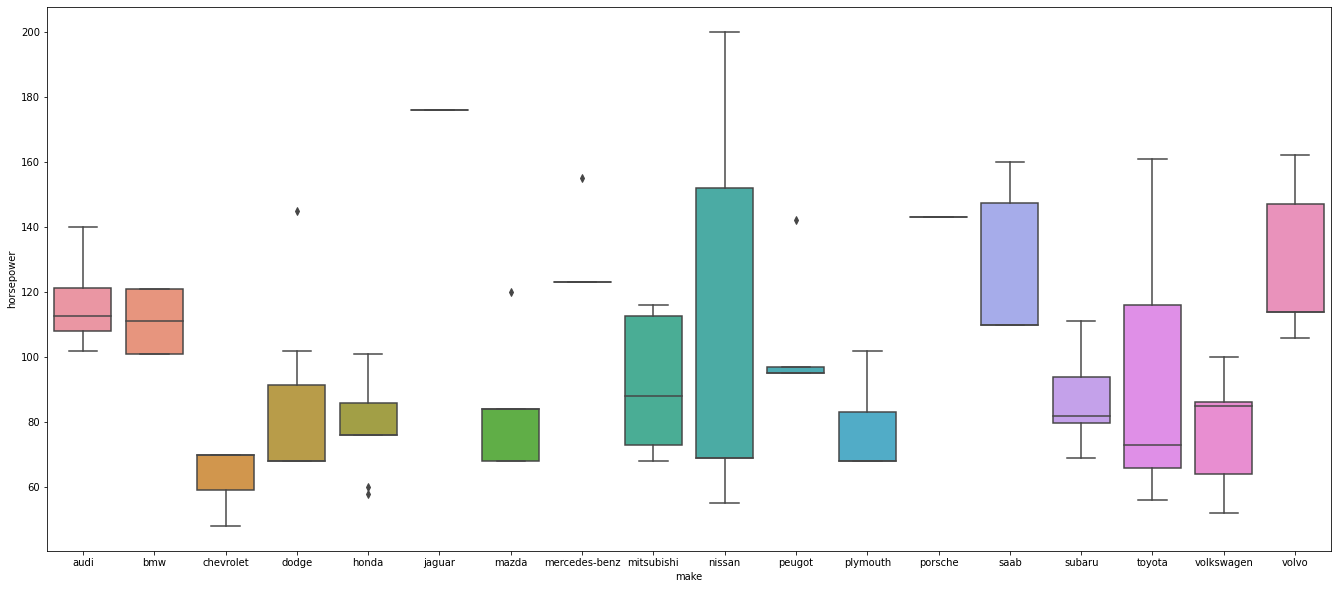

In [42]:
#boxplot of horsepower vs make
plt.rcParams['figure.figsize']=(23,10)
ax = sns.boxplot(x="make", y="horsepower", data=car_data)

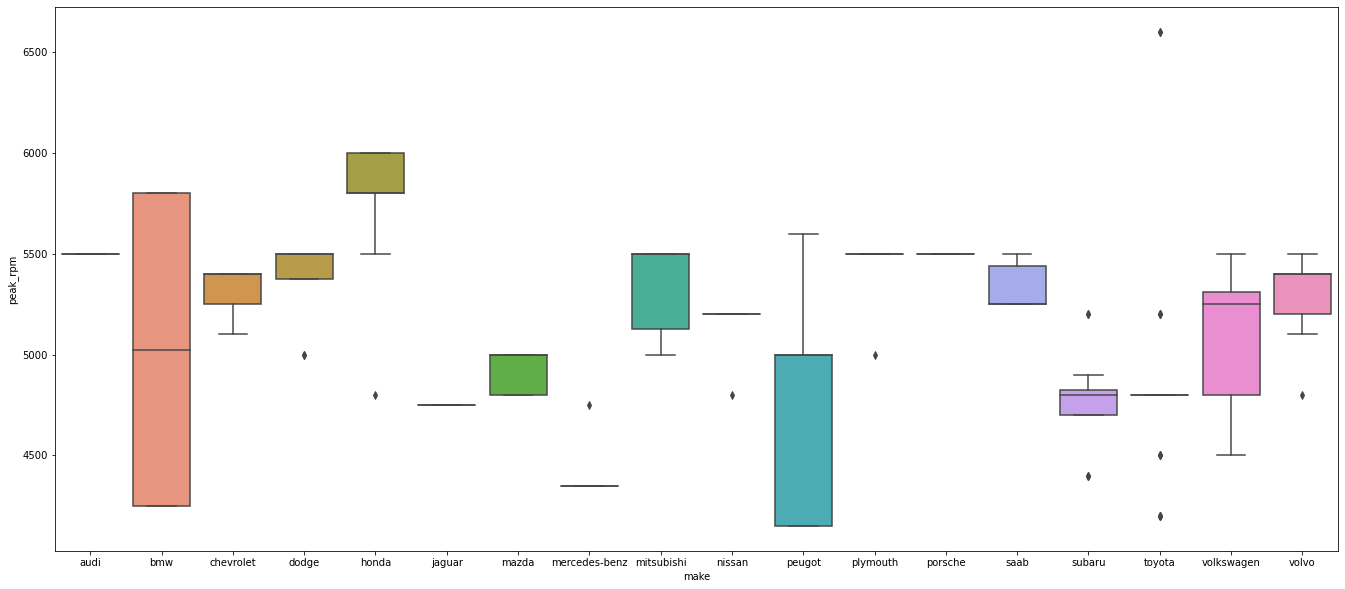

In [43]:
#boxplot of peak rpm vs make
plt.rcParams['figure.figsize']=(23,10)
ax = sns.boxplot(x="make", y="peak_rpm", data=car_data)

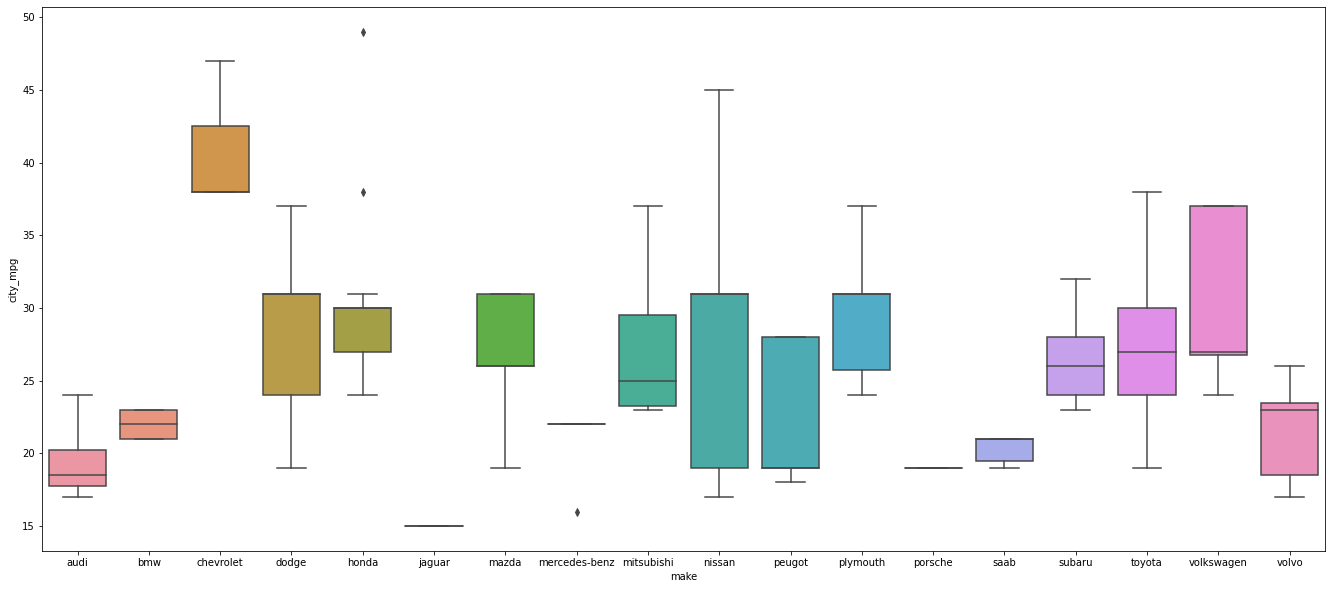

In [44]:
#boxplot of city mpg vs make
plt.rcParams['figure.figsize']=(23,10)
ax = sns.boxplot(x="make", y="city_mpg", data=car_data)

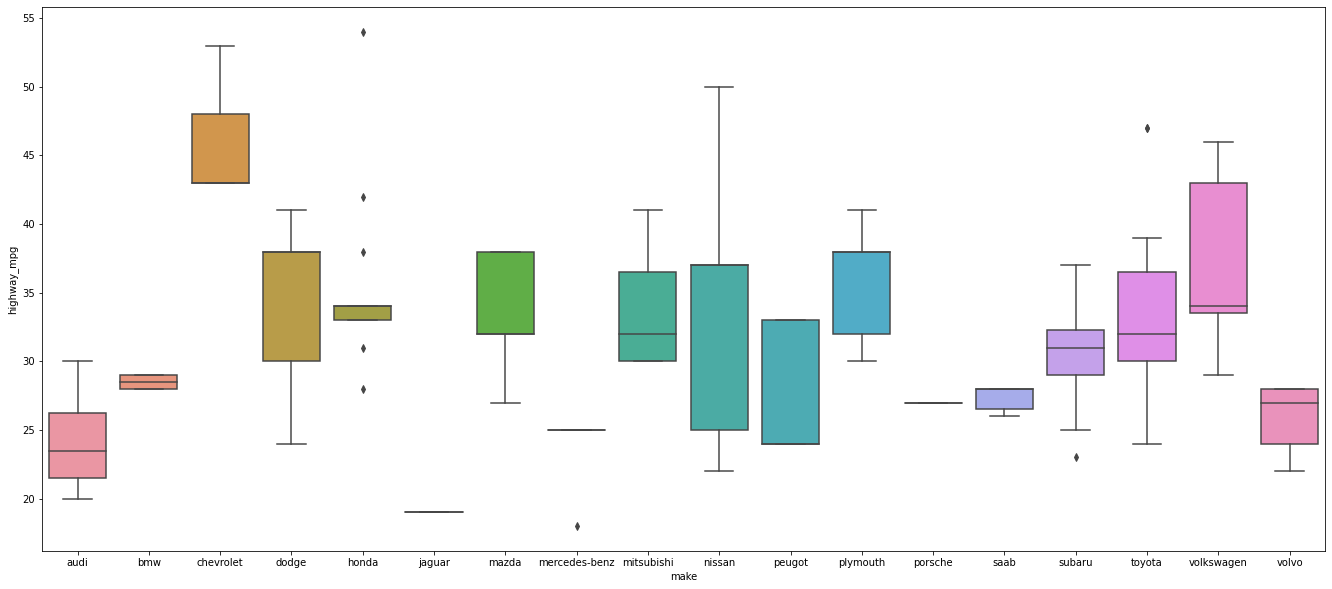

In [45]:
#boxplot of highway mpg vs make
plt.rcParams['figure.figsize']=(23,10)
ax = sns.boxplot(x="make", y="highway_mpg", data=car_data)

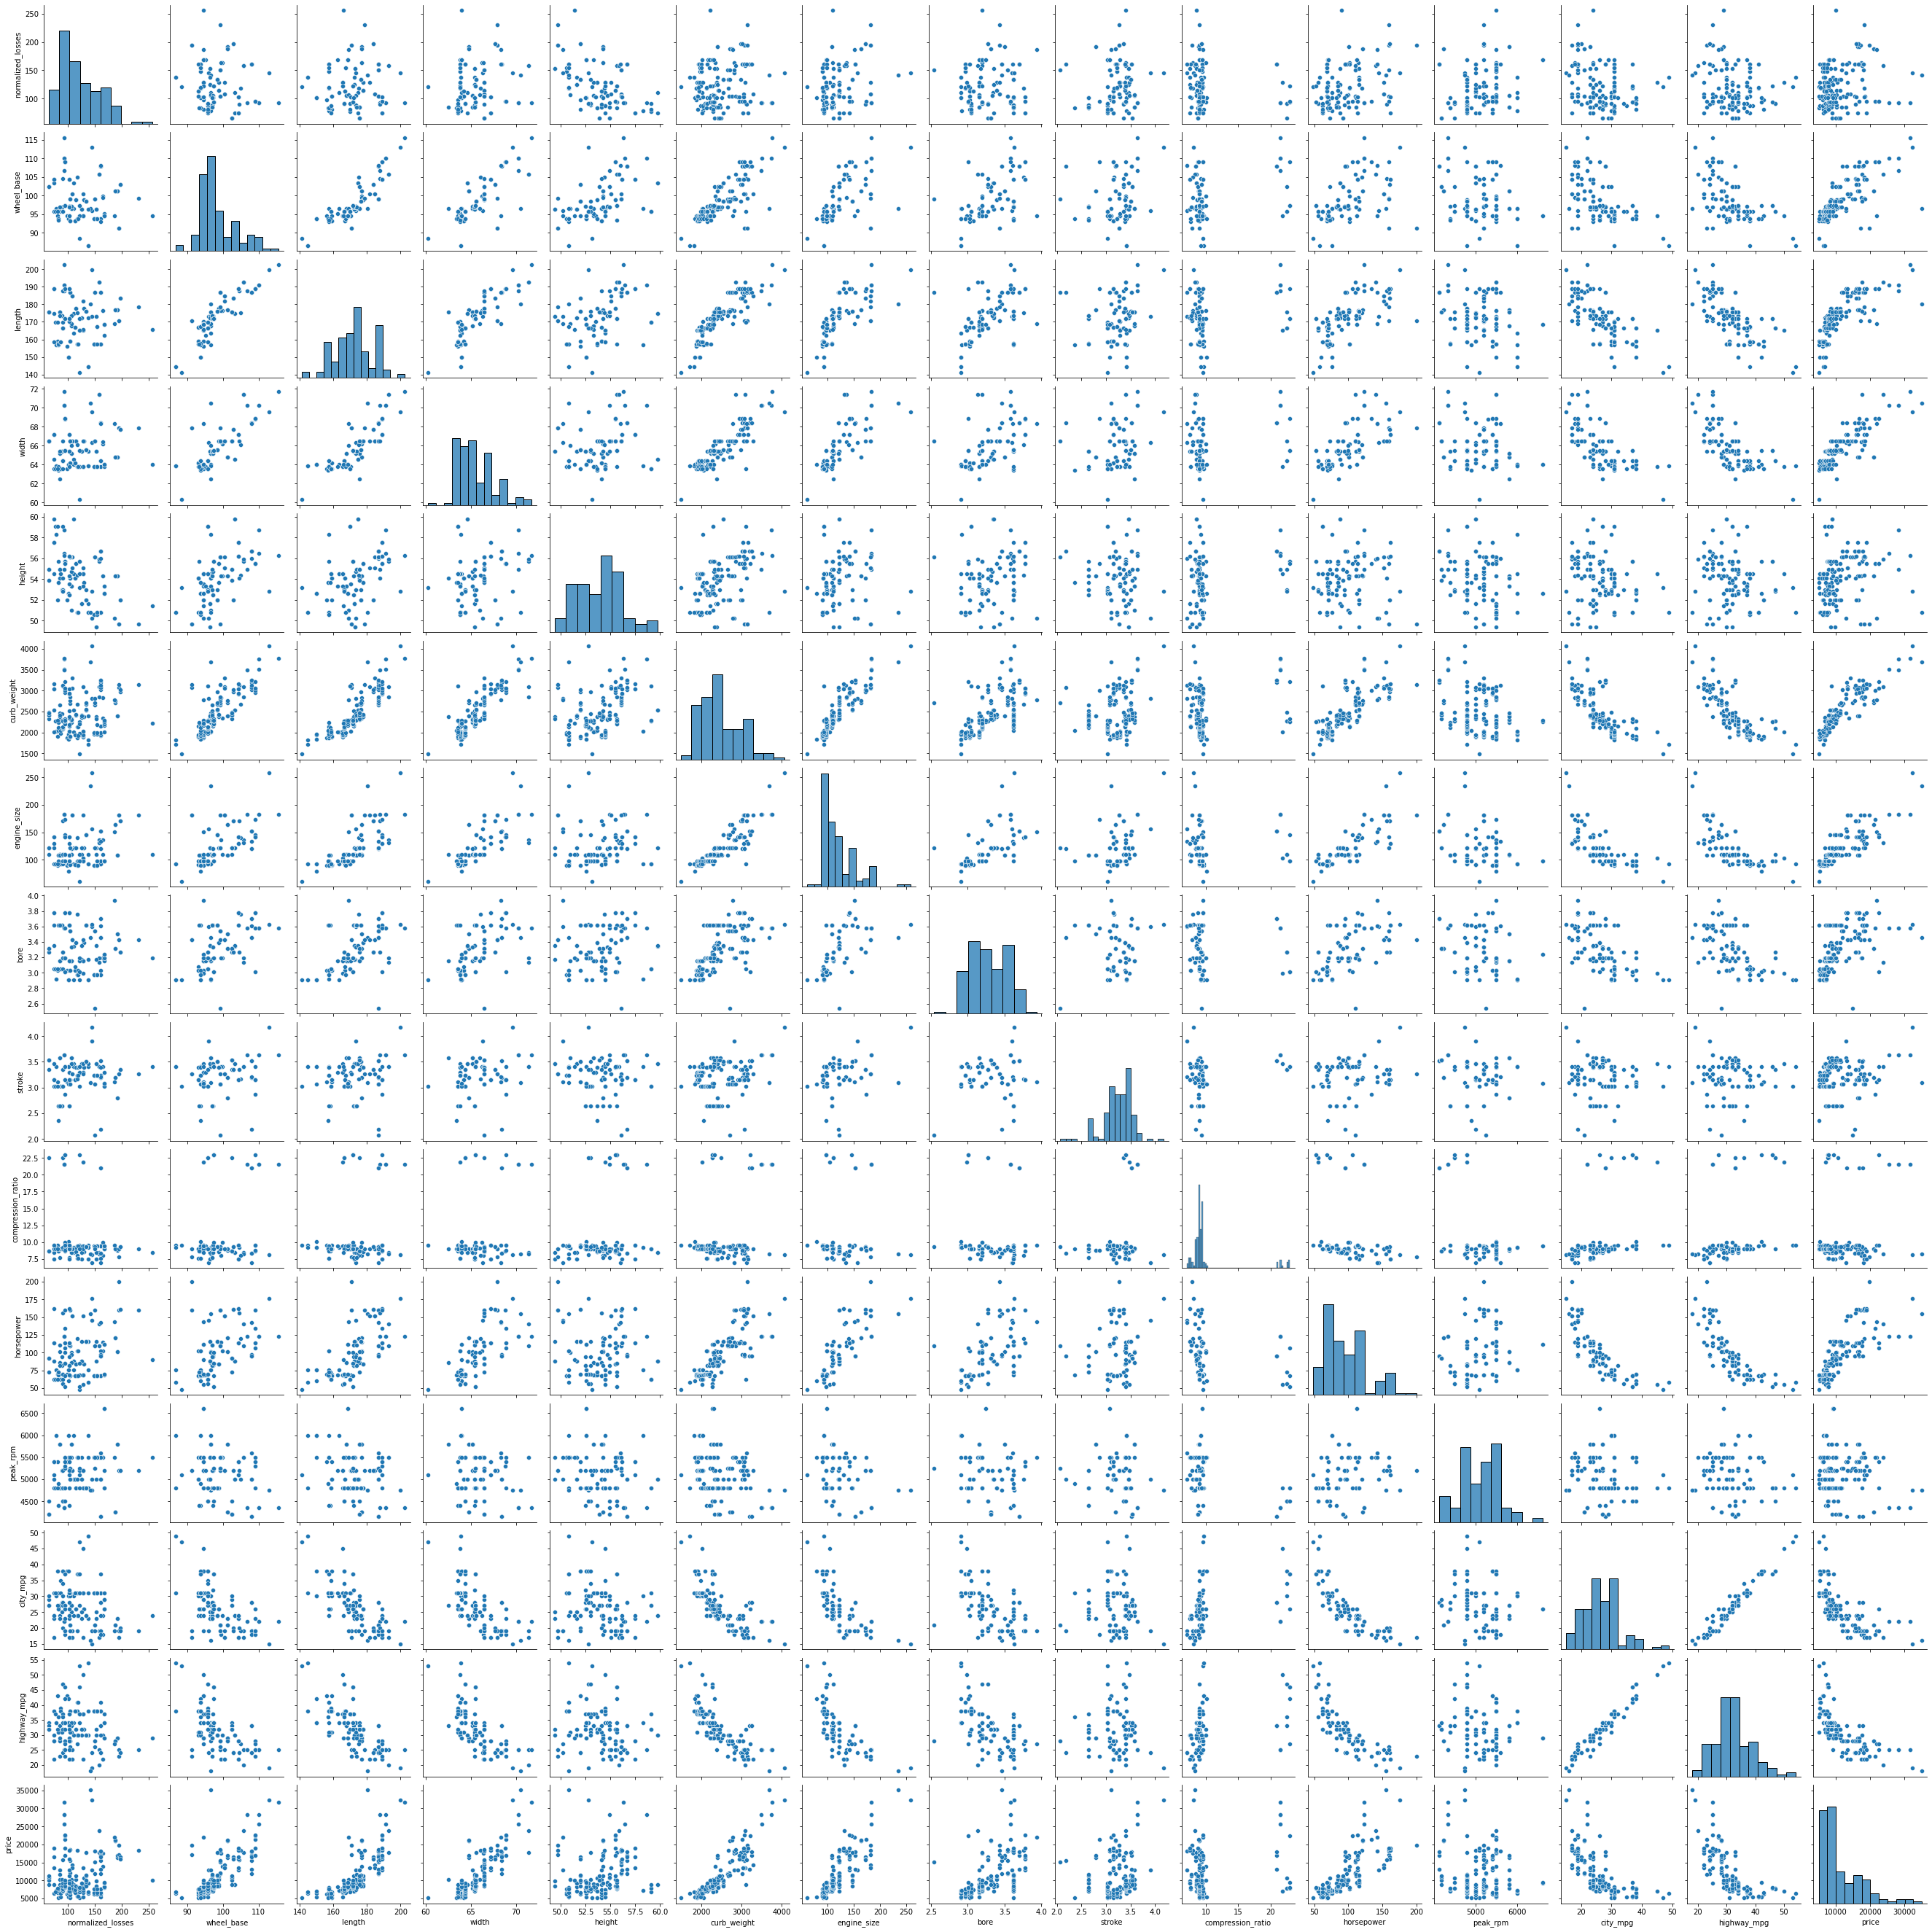

In [46]:
#pairplot of all continous variables
sns.pairplot(car_data[['normalized_losses','wheel_base','length','width','height','curb_weight','engine_size','bore','stroke','compression_ratio',
                    'horsepower','peak_rpm','city_mpg','highway_mpg','price']])